In [12]:
import networkx as nx
import json
from eodc_pg_parser.graph import OpenEOProcessGraph

from openeo.internal.process_graph_visitor import ProcessGraphVisitor, ProcessGraphUnflattener
from eodc_pg_parser.pg_schema import ProcessNode, ResultReference, PGEdgeType
import json

In [13]:
flat_graph = json.load(open("../tests/data/pg-evi-example.json", mode="r"))
parsed_graph = OpenEOProcessGraph(pg_data=flat_graph)


Deserialised process graph into nested structure


Walking node root-1b86e153-84f9-4b15-9816-92768794fd40
Walking node mintime-1b86e153-84f9-4b15-9816-92768794fd40
Walking node min-b0873704-cf80-494a-87d7-5bf7b5f38fbd
Walking node evi-1b86e153-84f9-4b15-9816-92768794fd40
Walking node m3-4bdbeb02-81b4-4112-a893-45fab64fc6f9
Walking node div-4bdbeb02-81b4-4112-a893-45fab64fc6f9
Walking node sub-4bdbeb02-81b4-4112-a893-45fab64fc6f9
Walking node nir-4bdbeb02-81b4-4112-a893-45fab64fc6f9
Walking node red-4bdbeb02-81b4-4112-a893-45fab64fc6f9
Walking node sum-4bdbeb02-81b4-4112-a893-45fab64fc6f9
Walking node nir-4bdbeb02-81b4-4112-a893-45fab64fc6f9
Walking node m1-4bdbeb02-81b4-4112-a893-45fab64fc6f9
Walking node red-4bdbeb02-81b4-4112-a893-45fab64fc6f9
Walking node m2-4bdbeb02-81b4-4112-a893-45fab64fc6f9
Walking node blue-4bdbeb02-81b4-4112-a893-45fab64fc6f9
Walking node load_collection-1b86e153-84f9-4b15-9816-92768794fd40


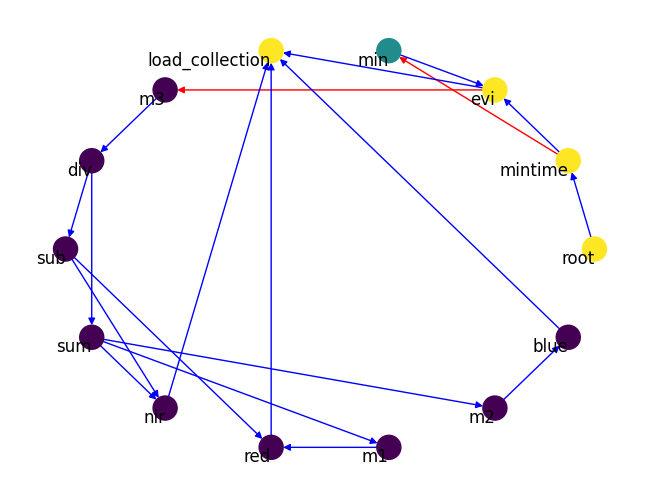

In [14]:
parsed_graph.plot()

In [15]:
parsed_graph.G.nodes

NodeView(('root-1b86e153-84f9-4b15-9816-92768794fd40', 'mintime-1b86e153-84f9-4b15-9816-92768794fd40', 'evi-1b86e153-84f9-4b15-9816-92768794fd40', 'min-b0873704-cf80-494a-87d7-5bf7b5f38fbd', 'load_collection-1b86e153-84f9-4b15-9816-92768794fd40', 'm3-4bdbeb02-81b4-4112-a893-45fab64fc6f9', 'div-4bdbeb02-81b4-4112-a893-45fab64fc6f9', 'sub-4bdbeb02-81b4-4112-a893-45fab64fc6f9', 'sum-4bdbeb02-81b4-4112-a893-45fab64fc6f9', 'nir-4bdbeb02-81b4-4112-a893-45fab64fc6f9', 'red-4bdbeb02-81b4-4112-a893-45fab64fc6f9', 'm1-4bdbeb02-81b4-4112-a893-45fab64fc6f9', 'm2-4bdbeb02-81b4-4112-a893-45fab64fc6f9', 'blue-4bdbeb02-81b4-4112-a893-45fab64fc6f9'))

In [16]:
nx.get_node_attributes(parsed_graph.G, "resolved_kwargs")

{'root-1b86e153-84f9-4b15-9816-92768794fd40': {'data': ResultReference(from_node='mintime', node=ProcessNode(process_id='reduce_dimension', namespace=None, result=False, description='Compute a minimum time composite by reducing the temporal dimension', arguments={'data': ProcessArgument(__root__=ResultReference(from_node='evi', node=ProcessNode(process_id='reduce_dimension', namespace=None, result=False, description='Compute the EVI. Formula: 2.5 * (NIR - RED) / (1 + NIR + 6*RED + -7.5*BLUE)', arguments={'data': ProcessArgument(__root__=ResultReference(from_node='load_collection', node=ProcessNode(process_id='load_collection', namespace=None, result=False, description='Loading the data', arguments={'id': ProcessArgument(__root__='Sentinel-2'), 'spatial_extent': ProcessArgument(__root__={'west': 16.1, 'east': 16.6, 'north': 48.6, 'south': 47.2}), 'temporal_extent': ProcessArgument(__root__=['2018-01-01', '2018-02-01']), 'bands': ProcessArgument(__root__=['B02', 'B04', 'B08'])}))), 'dime

In [ ]:
for edge in parsed_graph.G.edges(data=True):
    print(edge)

In [4]:

nx.node_link_data(parsed_graph.G)

{'directed': True,
 'multigraph': False,
 'graph': {},
 'nodes': [{'resolved_kwargs': {'data': ResultReference(from_node='mintime', node=ProcessNode(process_id='reduce_dimension', namespace=None, result=False, description='Compute a minimum time composite by reducing the temporal dimension', arguments={'data': ProcessArgument(__root__=ResultReference(from_node='evi', node=ProcessNode(process_id='reduce_dimension', namespace=None, result=False, description='Compute the EVI. Formula: 2.5 * (NIR - RED) / (1 + NIR + 6*RED + -7.5*BLUE)', arguments={'data': ProcessArgument(__root__=ResultReference(from_node='load_collection', node=ProcessNode(process_id='load_collection', namespace=None, result=False, description='Loading the data', arguments={'id': ProcessArgument(__root__='Sentinel-2'), 'spatial_extent': ProcessArgument(__root__={'west': 16.1, 'east': 16.6, 'north': 48.6, 'south': 47.2}), 'temporal_extent': ProcessArgument(__root__=['2018-01-01', '2018-02-01']), 'bands': ProcessArgument(__

## Second Process Graph

In [ ]:
flat_graph = json.load(open("../tests/data/fit_rf_pg_0.json", mode="r"))
parsed_graph = OpenEOProcessGraph(pg_data=flat_graph)


## Experiments

In [ ]:
import inspect

for edge in parsed_graph.G.out_edges:
    print("----------------------------------------------")
    if parsed_graph.G.edges[edge]["reference_type"] == PGEdgeType.ResultReference:
        node_where_parameter_belongs_to = parsed_graph.G.nodes[edge[0]]

        for arg_sub in parsed_graph.G.edges[edge]["arg_substitutions"]:
            arg_sub.access_func(new_value="please_change")

print(parsed_graph.G.nodes(data=True))


In [ ]:
{node: node_name for node, node_name in nx.get_node_attributes(parsed_graph.G, "node_name").items()}

In [ ]:
import networkx as nx
G = nx.DiGraph()
G.add_edge("here", "there", reference_type="Callback")
G.add_edge("here", "there", reference_type="Callback", tryout="hello")
G.add_edge("here", "there", reference_type="Callback", tryout="hehe")

G.edges(data=True)

In [ ]:
"hfere" in G

In [ ]:
for u, v, data in G.out_edges("here", data=True):
    print(type(u))
    print(v)
    if data["reference_type"] == "Callback":
        print(u)
        print(v)